# %% 1. Импорт & подключение

In [1]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent))

In [2]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent))   # <─ добавили путь

import pandas as pd, sqlalchemy as sa, matplotlib.pyplot as plt
from src.db.session import engine

In [3]:
# %% 2. Подключение к БД
qry = """
SELECT symbol, ts,
       buy_ex, sell_ex,
       buy_mid, sell_mid,
       net_spread
FROM   ohlcv_clean
"""
df = pd.read_sql(qry, engine)

Text(0.5, 0.98, '')

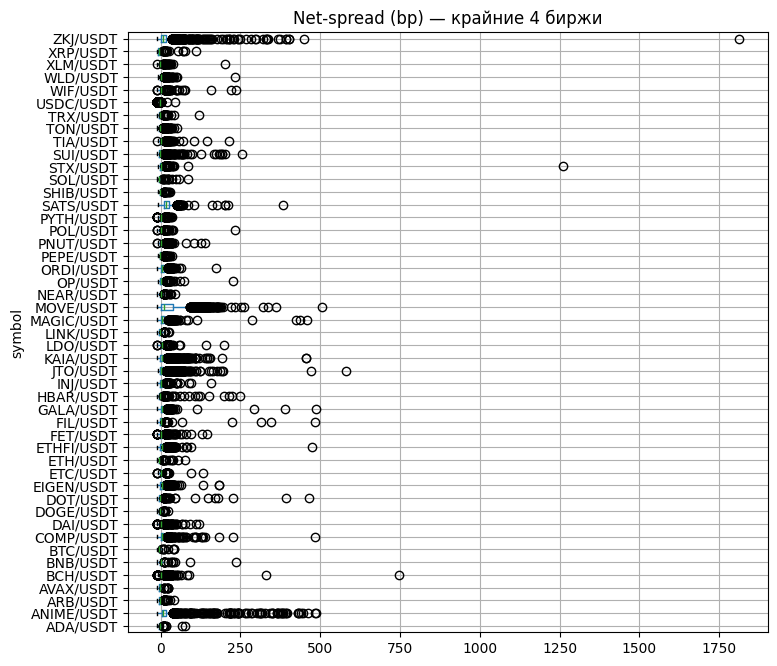

In [4]:
# %% 3. Переводим спрэды в bp (1 bp = 0.01 %)
mid = (df["buy_mid"] + df["sell_mid"]) / 2
df["bp"]  = df["net_spread"] / mid * 10_000         # положит. = прибыль после комиссий
df["dir"] = df.apply(lambda r: f"{r.buy_ex}->{r.sell_ex}", axis=1)

# boxplot по каждой паре
df.boxplot(column="bp", by="symbol", vert=False, figsize=(8, 8))
plt.title("Net-spread (bp) — крайние 4 биржи"); plt.suptitle("")

In [5]:
# %% 4. Сводка по парам
agg = (df.groupby("symbol")["bp"]
         .agg(rows="count",
              μ_bp = "mean",
              σ_bp = "std",
              hit  = lambda s: (s > 0).mean()*100,
              P95  = lambda s: s.quantile(0.95))
         .sort_values("μ_bp", ascending=False)
         .round(2))

display(agg)

,rows,μ_bp,σ_bp,hit,P95
symbol,,,,,
MOVE/USDT,3834,29.12,41.50,82.37,116.18
SATS/USDT,3834,19.88,14.44,97.86,40.13
ANIME/USDT,3834,16.29,41.13,87.04,37.77
ZKJ/USDT,3834,13.67,41.59,84.04,39.43
MAGIC/USDT,3834,7.05,15.29,82.03,20.03
ORDI/USDT,3834,5.93,7.69,82.00,19.05
JTO/USDT,3834,5.67,18.33,71.05,27.22
KAIA/USDT,3834,5.06,16.46,70.21,18.64
GALA/USDT,3834,4.72,13.00,75.48,16.99
